# Case 2: Simulate your model

In [1]:
using BOMBS

Just to print the nice BOMBS logo

In [2]:
printLogo()


                      ___________   __________   ___  ___   ___________   __________
                     /  _____   /  / ______  /  /   \/   \  \   _____  \  \  _______\
                    /  /____/  /  / /     / /  /          \  \  \____\  \  \ \________
                   /  _____   /  / /     / /  /            \  \   _____  \  \________ \
                  /  /    /  /  / /     / /  /   /\____/\   \  \  \    \  \          \ \
                 /  /____/  /  / /_____/ /  /   /        \   \  \  \____\  \   _______\ \
                /__________/  /_________/  /__ /          \___\  \__________\  \_________\

                


First we need to generate the model (the package will not do it automatically)

In [3]:
# Generate the empty dictionary with the model_def structure
model_def = defModStruct()

# Fill the different elements of the dictionary with your model specifications. See above how ^
model_def["NameF"] = ["PLacExample"];
model_def["nStat"] = [4];
model_def["nPar"] = [9];
model_def["nInp"] = [1];
model_def["stName"] = ["Cit_mrna","Cit_foldedP","Cit_fluo","Cit_AU"];

model_def["inpName"] = ["IPTG"];

model_def["parName"] = ["alpha1","Vm1","h1","Km1","d1",
                            "alpha2","d2","Kf","sc_molec"];
model_def["eqns"] = ["dCit_mrna=alpha1+Vm1*(IPTG^h1/(Km1^h1+IPTG^h1))-d1*Cit_mrna",
                    "dCit_foldedP=alpha2*Cit_mrna-(d2+Kf)*Cit_foldedP",
                    "dCit_fluo=Kf*Cit_foldedP-d2*Cit_fluo",
                    "dCit_AU = sc_molec*dCit_fluo"];

model_def["Y0eqs"] = ["Cit_mrna = (alpha1 + Vm1*(IPTG^h1/(Km1^h1+IPTG^h1)))/d1;",
                      "Cit_foldedP = (alpha2*Cit_mrna)/(Kf+d2);",
                      "Cit_fluo = (Kf*Cit_foldedP)/d2;",
                      "Cit_AU= sc_molec*Cit_fluo;"]; 

model_def["Y0Sim"] = [];
model_def["tols"] = [1e-9, 1e-9];

# Generate the scripts with the ODEs and the step-wise implementation
model_def = GenerateModel(model_def);


----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\ModelsFunctions\PLacExample_Model.jl
--------------------------------------------------------------------------------------



### This function gives you information about the structure necessary to generate the model and how to call it. 
If you do not know how to call a specific section, just call the function with no input (infoAll()) to get the information.

In [4]:
infoAll("simul")



                CALL defSimulStruct()
        MAIN STRUCTURE


simul_def["Nexp"] = [];
        # Integer indicating the number of experiments to be simulated

simul_def["finalTime"] = [];
        # Vector of final times for each simulation (initial time will always be assumed as 0,
        # so please consider that).

simul_def["switchT"] = [];
        # Array with the switching times of the inducer in the simulation (time 0 and final
        # time need to be considered)

simul_def["y0"] = [];
        # Array (single simulation) or matrix (multiple simulations) of Y0s for the simulations for each
        # experiment. If you are computing the steady-state this vector might not be used, however, you
        # still need to introduce it with some random numbers.

simul_def["preInd"] = [];
        # Vector of numbers with the values for the stimuli (inducer) in the over-night. It might be the case
        # that this entry is not required since only the y0 vector is considered for the 

# Simulation Example 1
Here we code each element of the experiment

In [5]:
simul_def = defSimulStruct()

Dict{Any,Any} with 10 entries:
  "uInd"      => Any[]
  "theta"     => Any[]
  "tsamps"    => Any[]
  "flag"      => Any[]
  "plot"      => Any[]
  "switchT"   => Any[]
  "Nexp"      => Any[]
  "y0"        => Any[]
  "preInd"    => Any[]
  "finalTime" => Any[]

In [6]:
simul_def["Nexp"] = [2]; 
simul_def["finalTime"] = [1439, 1439]; 
simul_def["switchT"] = [[0, 500, 1000, 1439],[0, 1439]]; 
simul_def["y0"] = [[10,10,10,10],[10,10,10,10]]; 
simul_def["preInd"] = [[0],[0]]; 
simul_def["uInd"] = [[5, 100, 1],[7.5]]; 
simul_def["theta"] = [0.000377125304442752*60, 0.00738924359598526*60, 1.53333782244337, 5.01927275636639,
    0.00118831480244382*60, 0.0461264539194078*60, 0.000475563708997018*60, 0.000301803966012407*60, 68.8669567134881]; # Could be the directory and file name of a csv.
simul_def["tsamps"] = [collect(0:5:1439),collect(0:10:1439)];
simul_def["plot"] = [true];
simul_def["flag"] = ["Example1"];

A print for the path where the results and plots are saved will be shown. This will be in your working directory inside a new directory called Results. 

In [7]:
simuls, model_def, simul_def = simulateODEs(model_def, simul_def);


----------------------------------------- PLOTS -----------------------------------------
Simulation PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name PlotSimulation_Exp(i)_Example1.png
--------------------------------------------------------------------------------------


----------------------------------------- RESULTS -----------------------------------------
Simulation results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name PLacExample_2021-01-22_SimulationResults_Example1.jld
--------------------------------------------------------------------------------------



### Let's see the results structure

The results are a dictionary with an entry for each experiment defined. By default, the key to the dictionary is Exp_i, where i is the index of the experiment

In [8]:
simuls

Dict{Any,Any} with 2 entries:
  "Exp_1" => [0.317361 18.8312 11.9507 823.01; 1.24696 25.1302 12.1432 836.265;…
  "Exp_2" => [0.317361 18.8312 11.9507 823.01; 2.37567 46.0153 13.6292 938.601;…

### For each experiment you will get an Array of size = 3. <br>
* The First dimension is sampling times. In this case 288. <br>
* The Second dimension is the states. In this case 4 states. <br>
* The Third dimension is the number of simulations. Since in this case we only introduced one vector theta, only 1 simulation per experiment. 

In [9]:
simuls["Exp_1"]

288×4×1 Array{Float64,3}:
[:, :, 1] =
 0.317361   18.8312  11.9507   823.01
 1.24696    25.1302  12.1432   836.265
 1.89779    39.7039  13.2395   911.764
 2.35346    57.9567  15.6036  1074.57
 2.67248    77.111   19.2471  1325.49
 2.89584    95.5703  24.0005  1652.84
 3.05222   112.493   29.617   2039.63
 3.1617    127.508   35.8337  2467.76
 3.23835   140.528   42.4045  2920.27
 3.29202   151.63    49.1166  3382.51
 3.32959   160.977   55.7959  3842.49
 3.3559    168.766   62.307   4290.9
 3.37432   175.207   68.55    4720.83
 ⋮                            
 0.800655   47.5083  30.1678  2077.56
 0.800655   47.5083  30.1654  2077.4
 0.800655   47.5083  30.1633  2077.26
 0.800655   47.5083  30.1615  2077.13
 0.800655   47.5083  30.16    2077.03
 0.800655   47.5083  30.1587  2076.93
 0.800655   47.5083  30.1575  2076.85
 0.800655   47.5083  30.1565  2076.78
 0.800655   47.5083  30.1556  2076.72
 0.800655   47.5083  30.1548  2076.67
 0.800655   47.5083  30.1542  2076.63
 0.800655   47.5083

In [10]:
using Images # Package not called in BOMBS, this is just to display the generated PNGs

Now we can plot the simulations to see how did they go: 

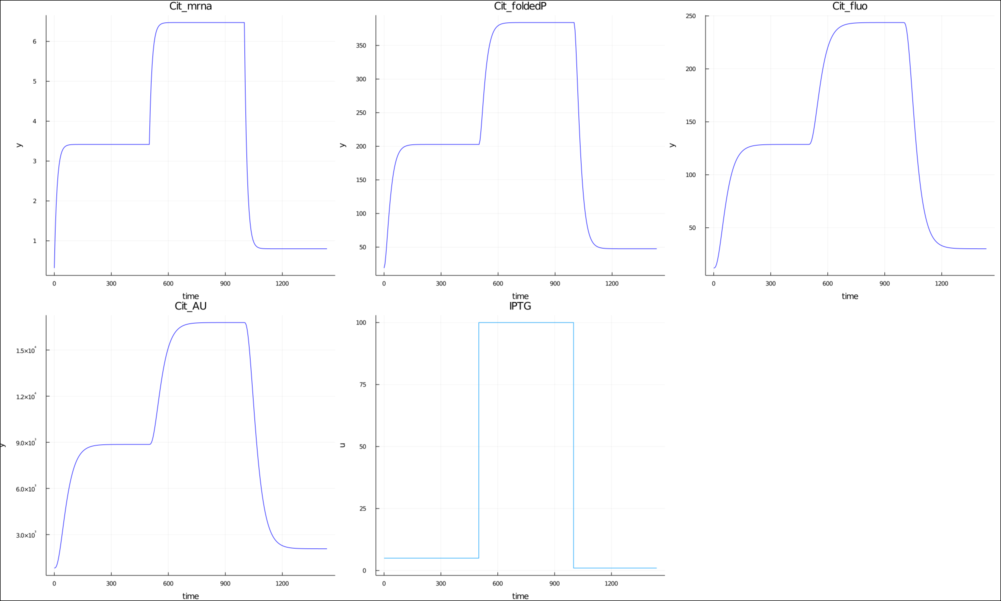

In [11]:
exp1 = load(string(simul_def["savepath"], "\\PlotSimulation_Exp",1,"_",simul_def["flag"],".png"))

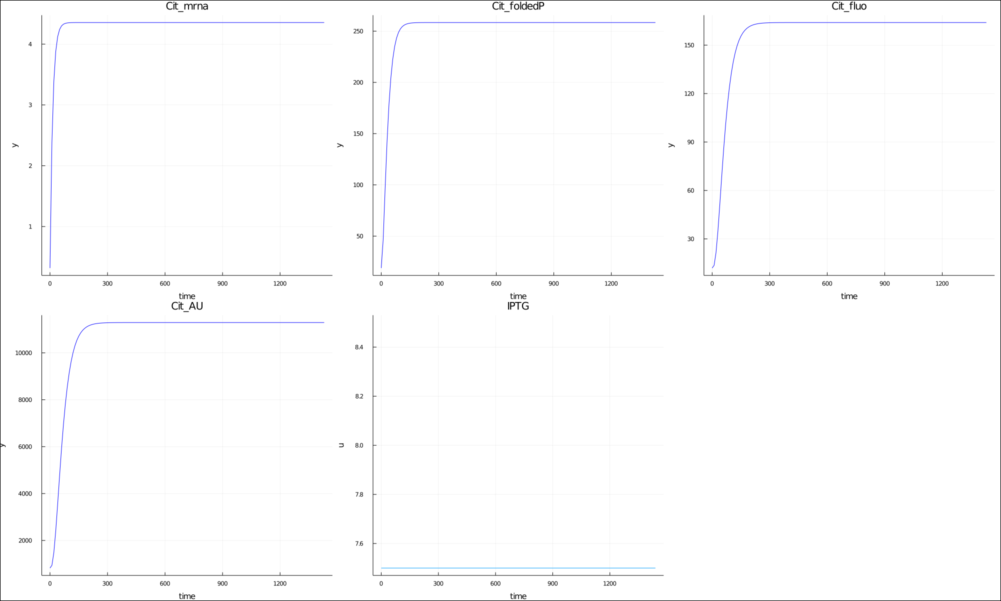

In [12]:
exp2 = load(string(simul_def["savepath"], "\\PlotSimulation_Exp",2,"_",simul_def["flag"],".png"))

If you would like to load the file with the results, just use the JLD package like this: 

In [13]:
using JLD
using Dates
JLD.load(string(simul_def["savepath"], "\\",model_def["NameF"], "_", today(),"_SimulationResults_",simul_def["flag"],".jld"))

Dict{String,Any} with 8 entries:
  "_creator\\JULIA_PATCH" => 0x00000000
  "simul_def"             => Dict{Any,Any}("savepath"=>"E:\\UNI\\D_Drive\\PhD\\…
  "_creator\\WORD_SIZE"   => 64
  "model_def"             => Dict{Any,Any}("stName"=>["Cit_mrna", "Cit_foldedP"…
  "_creator\\JULIA_MINOR" => 0x00000004
  "simuls"                => Dict{Any,Any}("Exp_1"=>[0.317361 18.8312 11.9507 8…
  "_creator\\ENDIAN_BOM"  => 0x04030201
  "_creator\\JULIA_MAJOR" => 0x00000001

### Extract Observables from a simulation:
If you want to extract the observables from a specified experiment simulation: 

In [14]:
obs = ["3*Cit_AU"]; # First we need to define what the observable is. This is just a made up observable to show that operations can also be made
SimObs = selectObsSim_te(simuls["Exp_1"], obs, model_def["stName"])

288×1×1 Array{Float64,3}:
[:, :, 1] =
  2469.0287158650076
  2508.796076548545
  2735.29301944696
  3223.70913451226
  3976.4620194719128
  4958.516665120999
  6118.900467555957
  7403.275694080308
  8760.81589399778
 10147.535488692383
 11527.48013323846
 12872.687108517035
 14162.49259309584
     ⋮
  6232.689520220343
  6232.197919176049
  6231.77161741173
  6231.4019468801325
  6231.081387820611
  6230.803418334594
  6230.562383253574
  6230.35337569826
  6230.172142632218
  6230.014993361468
  6229.878729080538
  6229.760574442211

In [26]:
a,~,c = size(simuls["Exp_1"])
reshape(simuls["Exp_1"][:,4,:], a,1,c).*3 == SimObs

true

# Simulation Example 2
This is the same example, but shows how to introduce a matrix of y0 (one for each theta sample). Note that in this case y0 is computed so the values shown here will not be used, it is only to display the example

In [28]:
simul_def = defSimulStruct();
simul_def["Nexp"] = [2]; 
simul_def["finalTime"] = [1439, 1439]; 
simul_def["switchT"] = [[0, 500, 1000, 1439],[0, 1439]]; 
simul_def["y0"] = [[10,10,10,10],[10 10 10 10; 20 20 20 20; 30 30 30 30]]; # Matrix cn be introduced for any experiment or all of them. 
simul_def["preInd"] = [[0],[0]]; 
simul_def["uInd"] = [[5, 100, 1],[7.5]]; 
simul_def["theta"] = ["TestThetaPLac.csv"]; # Could be the directory and file name of a csv.
simul_def["tsamps"] = [collect(0:5:1439),collect(0:10:1439)];
simul_def["plot"] = [true];
simul_def["flag"] = ["Example2"];

In this case, theta has 3 samples, so there will be 3 simulations in the results (3rd entry of the array), one for each theta vector

In [29]:
simuls, model_def, simul_def = simulateODEs(model_def, simul_def);


----------------------------------------- PLOTS -----------------------------------------
Simulation PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name PlotSimulation_Exp(i)_Example2.png
--------------------------------------------------------------------------------------


----------------------------------------- RESULTS -----------------------------------------
Simulation results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name PLacExample_2021-01-22_SimulationResults_Example2.jld
--------------------------------------------------------------------------------------



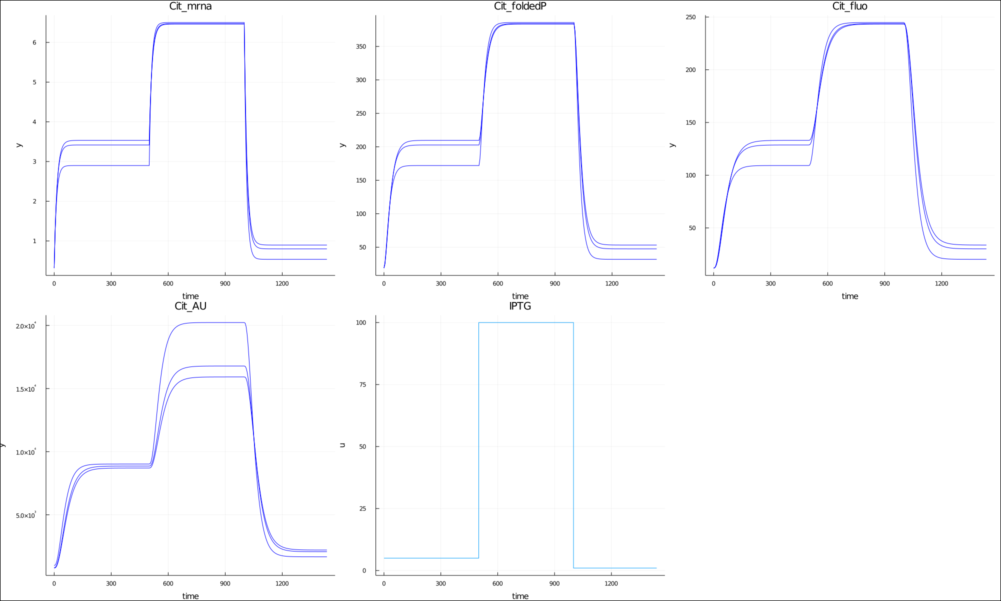

In [30]:
exp1 = load(string(simul_def["savepath"], "\\PlotSimulation_Exp",1,"_",simul_def["flag"],".png"))

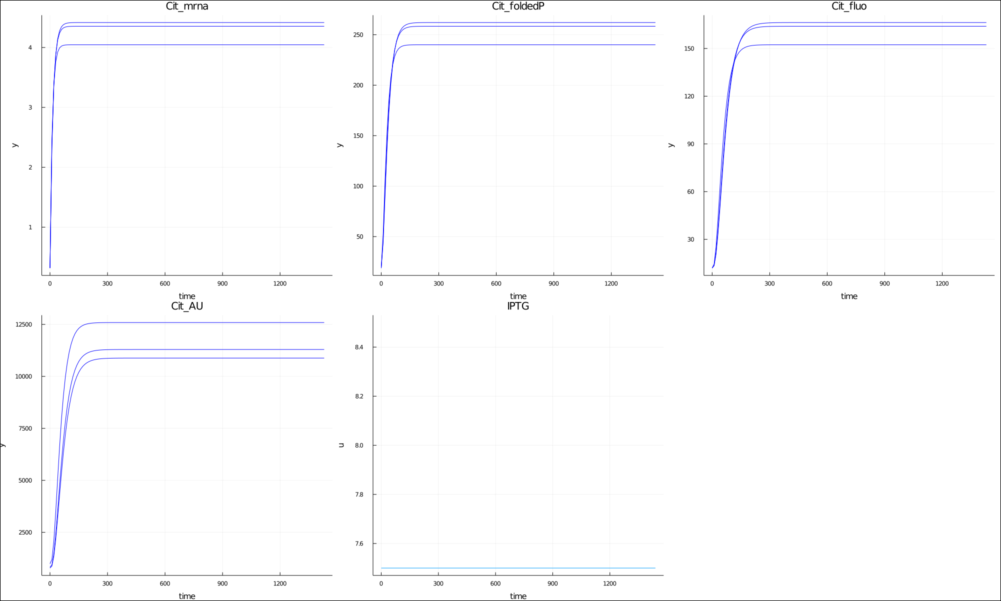

In [31]:
exp1 = load(string(simul_def["savepath"], "\\PlotSimulation_Exp",2,"_",simul_def["flag"],".png"))

If you would like to load the file with the results, just use the JLD package like this: 

In [32]:
JLD.load(string(simul_def["savepath"], "\\",model_def["NameF"], "_", today(),"_SimulationResults_",simul_def["flag"],".jld"))

Dict{String,Any} with 8 entries:
  "_creator\\JULIA_PATCH" => 0x00000000
  "simul_def"             => Dict{Any,Any}("savepath"=>"E:\\UNI\\D_Drive\\PhD\\…
  "_creator\\WORD_SIZE"   => 64
  "model_def"             => Dict{Any,Any}("stName"=>["Cit_mrna", "Cit_foldedP"…
  "_creator\\JULIA_MINOR" => 0x00000004
  "simuls"                => Dict{Any,Any}("Exp_1"=>[0.317361 18.8312 11.9507 8…
  "_creator\\ENDIAN_BOM"  => 0x04030201
  "_creator\\JULIA_MAJOR" => 0x00000001

In [33]:
obs = ["3*Cit_AU"]; # First we need to define what the observable is. This is just a made up observable to show that operations can also be made
SimObs = selectObsSim_te(simuls["Exp_1"], obs, model_def["stName"])

288×1×3 Array{Float64,3}:
[:, :, 1] =
  2469.0287158650076
  2508.796076548545
  2735.29301944696
  3223.70913451226
  3976.4620194719128
  4958.516665120999
  6118.900467555957
  7403.275694080308
  8760.81589399778
 10147.535488692383
 11527.48013323846
 12872.687108517035
 14162.49259309584
     ⋮
  6232.689520220343
  6232.197919176049
  6231.77161741173
  6231.4019468801325
  6231.081387820611
  6230.803418334594
  6230.562383253574
  6230.35337569826
  6230.172142632218
  6230.014993361468
  6229.878729080538
  6229.760574442211

[:, :, 2] =
  2345.5772800717577
  2379.489524771281
  2574.6126522060827
  3000.1651392509634
  3663.5714217149252
  4538.944447299982
  5584.948893951451
  6755.6186422810315
  8006.566664041492
  9298.238506146929
 10597.31736944275
 11877.015823679214
 13116.734636510253
     ⋮
  6634.300170443978
  6633.549444258713
  6632.893743020328
  6632.321048898806
  6631.820861320284
  6631.384005769534
  6631.002469419316
  6630.669249918593
  6630.37823226

In [34]:
a,~,c = size(simuls["Exp_1"])
reshape(simuls["Exp_1"][:,4,:], a,1,c).*3 == SimObs

true

# Simulation Example 3
Here we will use CVS files to extract the elements for the experiment

In [35]:
simul_def = defSimulStructFiles()

ALL THE FILES MUST BE CSV FILES!!!

---------------------------------------------------------------------------------------------------------

The observables file entry should have the following structure: 
Column 1: Sampling Times for the simulations
Column 2 + Number of states: Y0 value for each each state (in order) in each column. 
           Value might need to be repeated across all the column, but only the first row will be considered

---------------------------------------------------------------------------------------------------------

The event inputs file entry should have the following structure: 
Column 1: Each Switching time (final time not considered)
Column 2: Final time (can be repeated for as many entrances as column 1 has)
Column 3 + number of inducers: Repeated column for the value of the inducers in the ON. 
              If no pre-inducer will be used in the simulations, any number could be used
Column 4 + number of inducers: Value of each inducer at each swit

Dict{Any,Any} with 6 entries:
  "theta"           => Any[]
  "ObservablesFile" => Any[]
  "flag"            => Any[]
  "plot"            => Any[]
  "EventInputsFile" => Any[]
  "MainDir"         => Any[]

In [36]:
simul_def["ObservablesFile"] = ["DynStim_3_Observables.csv", "DynStim_4_Observables.csv"]; 
simul_def["EventInputsFile"] = ["DynStim_3_Events_Inputs.csv", "DynStim_4_Events_Inputs.csv"]; 
simul_def["theta"] = ["TestThetaPLac.csv"]; 
simul_def["MainDir"] = ["SimulationCSVs"];
simul_def["flag"] = "Example3";
simul_def["plot"] = "Yes";

In [37]:
simuls, model_def, simul_def = simulateODEs(model_def, simul_def);


----------------------------------------- PLOTS -----------------------------------------
Simulation PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name PlotSimulation_Exp(i)_Example3.png
--------------------------------------------------------------------------------------


----------------------------------------- RESULTS -----------------------------------------
Simulation results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name PLacExample_2021-01-22_SimulationResults_Example3.jld
--------------------------------------------------------------------------------------



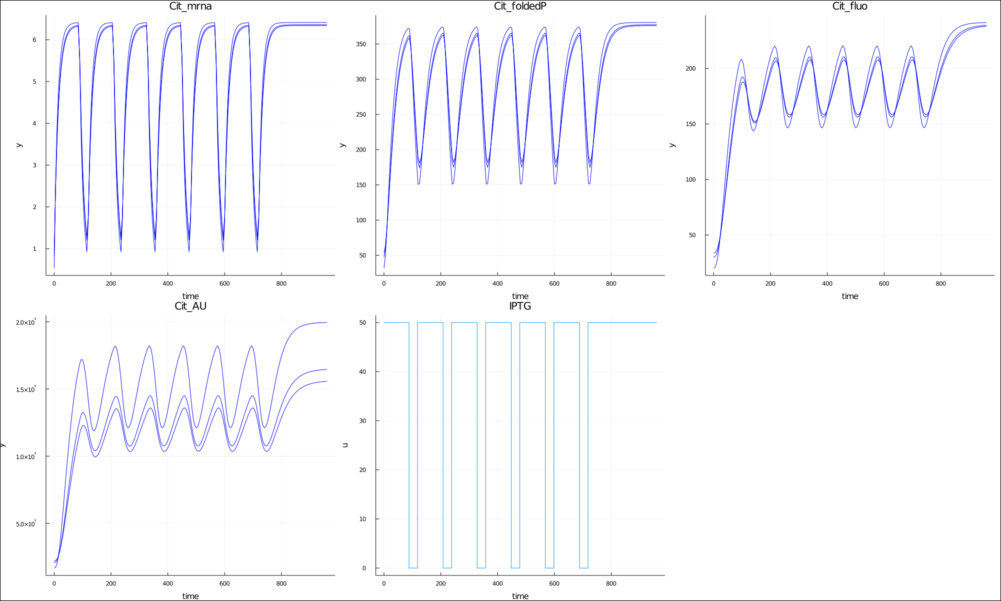

In [38]:
exp1 = load(string(simul_def["savepath"], "\\PlotSimulation_Exp",1,"_",simul_def["flag"],".png"))

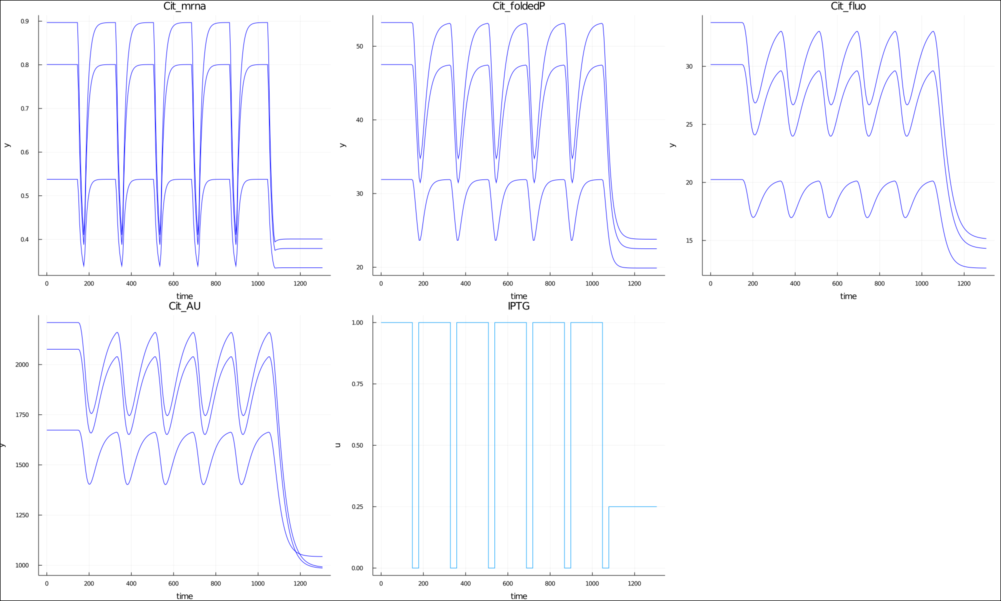

In [39]:
exp1 = load(string(simul_def["savepath"], "\\PlotSimulation_Exp",2,"_",simul_def["flag"],".png"))

In [40]:
# If you would like to load the file with the results, just use the JLD package like this: 
JLD.load(string(simul_def["savepath"], "\\",model_def["NameF"], "_", today(),"_SimulationResults_",simul_def["flag"],".jld"))

Dict{String,Any} with 8 entries:
  "_creator\\JULIA_PATCH" => 0x00000000
  "simul_def"             => Dict{Any,Any}("savepath"=>"E:\\UNI\\D_Drive\\PhD\\…
  "_creator\\WORD_SIZE"   => 64
  "model_def"             => Dict{Any,Any}("stName"=>["Cit_mrna", "Cit_foldedP"…
  "_creator\\JULIA_MINOR" => 0x00000004
  "simuls"                => Dict{Any,Any}("Exp_1"=>[0.800655 47.5083 30.1499 2…
  "_creator\\ENDIAN_BOM"  => 0x04030201
  "_creator\\JULIA_MAJOR" => 0x00000001

In [41]:
obs = ["3*Cit_AU"]; # First we need to define what the observable is. This is just a made up observable to show that operations can also be made
SimObs = selectObsSim_te(simuls["Exp_1"], obs, model_def["stName"])

193×1×3 Array{Float64,3}:
[:, :, 1] =
  6228.989854397258
  6300.277257312555
  6706.298137396307
  7581.83817050725
  8931.231168883649
 10691.672994649372
 12771.789604118678
 15074.17458667819
 17507.71589561902
 19993.56450452076
 22467.268264261045
 24878.70090069648
 27190.820223072355
     ⋮
 48910.31946409414
 48981.68053000825
 49043.96107714591
 49098.28405041218
 49145.640526813084
 49186.903656132745
 49222.841484757795
 49254.128661195784
 49281.357052484374
 49305.04532131861
 49325.647522833024
 49343.560790139076

[:, :, 2] =
  6628.372189659456
  6685.752390342365
  7015.904650262839
  7735.948025451982
  8858.44481051873
 10339.593592564908
 12109.454174604025
 14090.250956396658
 16206.880193081044
 18392.414953535495
 20590.482543063965
 22755.75809052007
 24853.387279712115
     ⋮
 46194.40361377108
 46275.142484624484
 46346.180628364426
 46408.6423237248
 46463.53009134977
 46511.73605656139
 46554.05266446602
 46591.18267813548
 46623.74842727186
 46652.30029714

In [42]:
a,~,c = size(simuls["Exp_1"])
reshape(simuls["Exp_1"][:,4,:], a,1,c).*3 == SimObs

true

### This is the end of the section. Look at the cool logo to check the package version ;) 

In [43]:
versionBOMBS()


                                                  *
                                    **           * *           *                          **
                                   * *          *   *         * *                       **  *
                                  *  *         *    *        *  **                    **     *
                         *       *   *  *   ***     *     ***    **                 **        *      *
                        * *     *    * * * *         **  *         **      *      **           *    * *   ***
                       *   *   *     **   *            **            **   * * ****              ****   ***   ***
                   ** *     ***                                        * *   *                                  *
                  *  *                                                  *                                        *
                 *            ___________   __________   ___  ___   ___________   __________                  